# Vision

In this notebook we explore the mechanisms of vision.

Useful links:
* [Photo: Barack Obama State of the Union 2011](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/2011_State_of_the_Union_Obama.jpg/640px-2011_State_of_the_Union_Obama.jpg)
* [Multi-dimensional image processing](https://docs.scipy.org/doc/scipy-0.14.0/reference/ndimage.html) (scipy.ndimage)
* [scipy.ndimage.filters.gaussian_filter](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.filters.gaussian_filter.html#scipy.ndimage.filters.gaussian_filter)
* [Homomorphic filtering](https://en.wikipedia.org/wiki/Homomorphic_filtering)
* [Signal Processing Stack Exchange](https://dsp.stackexchange.com/)
* [Difference between LoG/DoG/Ricker](https://dsp.stackexchange.com/questions/37673/what-is-the-difference-between-difference-of-gaussian-laplace-of-gaussian-and?newreg=e3dc4f6e3c8e42b1994186f86c949b79)
* [A panorama on multiscale geometric representations, intertwining spatial, directional and frequency selectivity (Signal Processing 2011)](http://www.sciencedirect.com/science/article/pii/S0165168411001356)

In [1]:
%matplotlib inline

In [14]:
import numpy as np
import scipy.ndimage as sci
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

## Loading Images

We can start by loading an exmaple image. Most images are color, which consists of three separate channels (red, blue, green). When all three channels are 100% maximum, we get the color white (the combination of all colors of light). When all three channels are 0%, we get the color black (the absence of any color).

To focus on light intensity, we'll covert an image to grayscale.

In [15]:
color = sci.imread('data/img/Obama2k11SOTU.jpg')
print(np.shape(color))

(425, 640, 3)


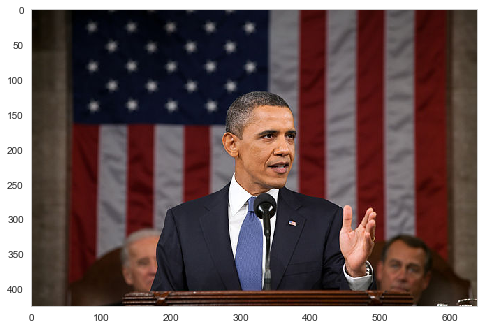

In [16]:
plt.imshow(color)

Now convert to grayscale by taking the average of the three color channels, and using that value as the intensity:

$$
I = \dfrac{R + G + B}{3}
$$

In [17]:
nx = np.shape(color)[0]
ny = np.shape(color)[1]
gray = np.empty(shape=(nx,ny))
print(np.shape(gray))

(425, 640)


In [18]:
def coloravg(pixel):
    #return 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]
    return np.mean([pixel[i] for i in range(3)])

In [19]:
for x in range(nx):
    for y in range(ny):
        gray[x][y] = coloravg(color[x][y])

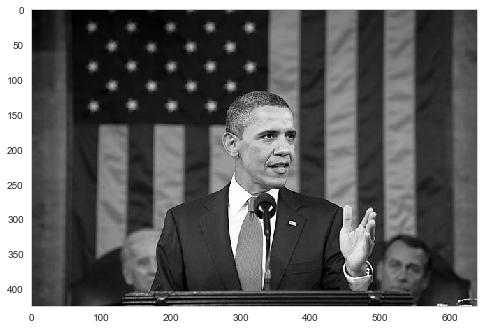

In [20]:
cmap_gray = plt.cm.Greys_r
plt.imshow(gray, cmap=cmap_gray)

## Locating Changes in Intensity

If we want to detect shapes and lines in an image, we can focus on locating changes in light intensity. But detecting changes in intensity leads to very noisy signals:

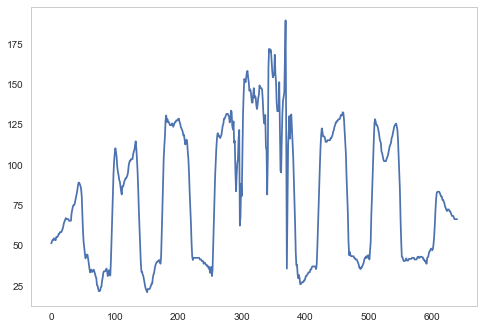

In [21]:
plt.plot(gray[int(425/2),:])
plt.show()

Filtering, which amounts to a spatial averaging of intensities of pixels, can help cut down on the noise.

A crude local averaging technique will apply a simple one-dimensional weighted filter:

$$
\frac{1}{3} \left( x_{i-1} + x_{i} + x_{i+1} \right)
$$

A better approach is to apply a filter shaped like a Gaussian function:

$$
f(x) = \dfrac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{{x-\mu}^2}{2 \sigma^2} }
$$

----------------------------------------------------------------------------------------------------
Sigma = 0.1


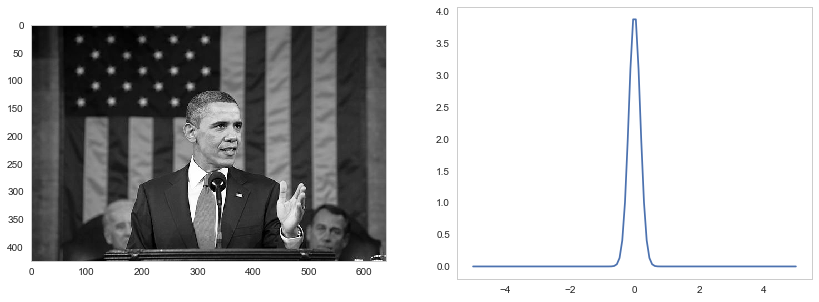

----------------------------------------------------------------------------------------------------
Sigma = 1.0


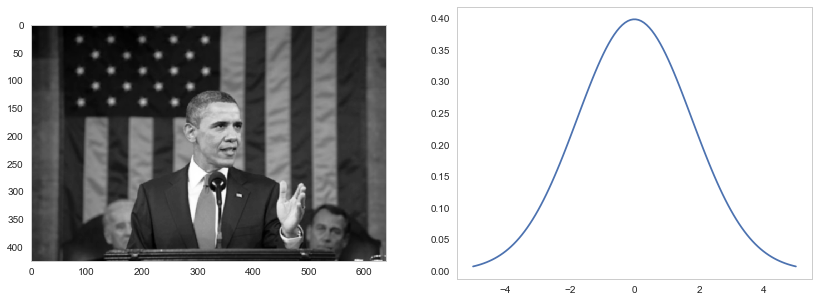

----------------------------------------------------------------------------------------------------
Sigma = 10.0


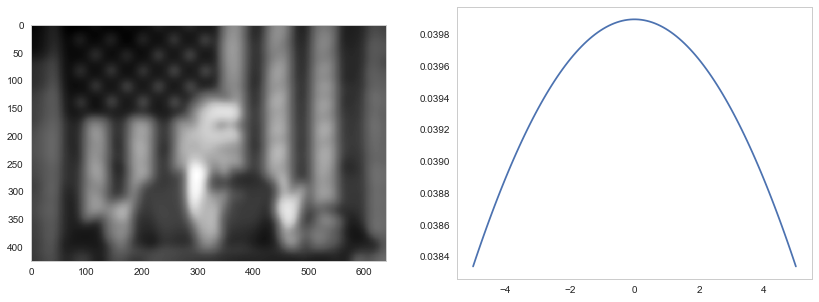

In [35]:
def gaussian(x, mu, sig):
    return (1/(np.sqrt(2*np.pi*sig*sig))) * np.exp(-np.power(x - mu, 2.) / (2 * np.pi * np.power(sig, 2.)))

for sigma in np.logspace(-1,1,3):
    print("-"*100)
    print("Sigma = {0}".format(sigma))
    
    fig = plt.figure(figsize=(14,5))
    ax1, ax2 = [fig.add_subplot(121+i) for i in range(2)]
    
    result = sci.filters.gaussian_filter(gray,sigma)
    ax1.imshow(result, cmap=cmap_gray)

    xx = np.linspace(-5,5,120)
    ax2.plot(xx, gaussian(xx,0,sigma))    

    plt.show()

----------------------------------------------------------------------------------------------------
Sigma = 0.1


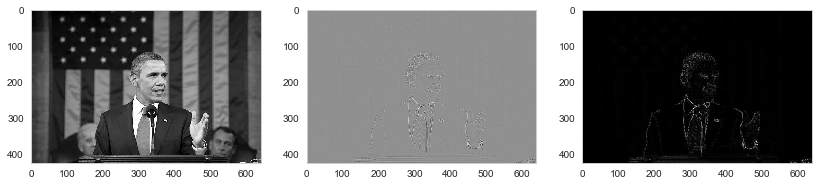

----------------------------------------------------------------------------------------------------
Sigma = 1.0


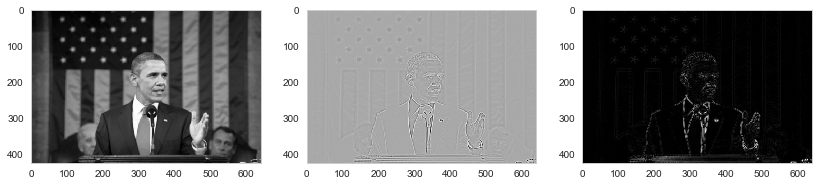

----------------------------------------------------------------------------------------------------
Sigma = 10.0


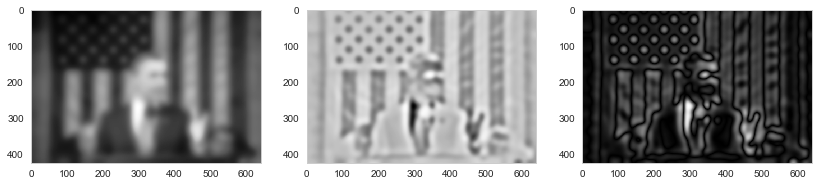

In [38]:
for sigma in np.logspace(-1,1,3):
    print("-"*100)
    print("Sigma = {0}".format(sigma))
    
    fig = plt.figure(figsize=(14,5))
    ax1, ax2, ax3 = [fig.add_subplot(131+i) for i in range(3)]
    
    filtered = sci.filters.gaussian_filter(gray,sigma)
    ax1.imshow(filtered, cmap=cmap_gray)
    
    laplace = sci.filters.laplace(filtered)
    ax2.imshow(laplace, cmap=cmap_gray)
    ax3.imshow(np.abs(laplace), cmap=cmap_gray)
    
    plt.show()
